Demonstrate emitted power distributions (Eq. 4.99 in your text, pg. 142) for arbitrary acceleration. Our textbook is Radiative Processes in Astrophysics by Rybicki and Lightman.

First, import the necessary packages


In [1]:
# This tells all of the cells to communicate with each other
%matplotlib notebook 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



Define the axes used to plot the distribution

In [2]:
def set_axes_equal(ax, scale, zfactor):

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5*max([x_range, y_range, z_range])

    sf = scale
    sfz = scale * zfactor

    ax.set_xlim3d([sf*(x_middle - plot_radius), sf*(x_middle + plot_radius)])
    ax.set_ylim3d([sf*(y_middle - plot_radius), sf*(y_middle + plot_radius)])
    ax.set_zlim3d([sfz*(z_middle - plot_radius), sfz*(z_middle + plot_radius)])


The equation for the distribution of the power emitted.

In [3]:
# all angles_p are the primed angle, or the angle in the momentarily co-moving  rest frame (MCRF)
# Theta_p is the angle between the acceleration and the direction  of the observer
# theta_p is the angle between the velocity and observer
# alpha_p is the angle between the acceleration and velocity
# phi_p is the angle between the x-axis and the observer. This is the same as   phi in the observer's frame 

def rfactor(theta, phi, beta, alpha):
    alpha_p = np.arctan((1/gamma)*np.tan(alpha))
    phi_p = phi
    theta_p = np.arccos((np.cos(theta) - beta) / (1 - beta*np.cos(theta)))
    Theta_p = np.arccos((np.cos(alpha_p)*np.cos(theta_p)) + (np.sin(alpha_p)*np.sin(theta_p)*(np.cos(phi_p))))
    return ((gamma**2 * np.power(np.cos(alpha),2)) + np.power(np.sin(alpha),2)) * ((1- np.power(np.cos(Theta_p), 2)) / (np.power(1 - beta*np.cos(theta),3)))






Here, we define the angles theta, phi, and alpha as well as the velocity beta. They are then used along with the rfactor from above to create the cartesian coordinates x,y,z. You can change the angle you view the distribution at the bottom of this cell.

<IPython.core.display.Javascript object>


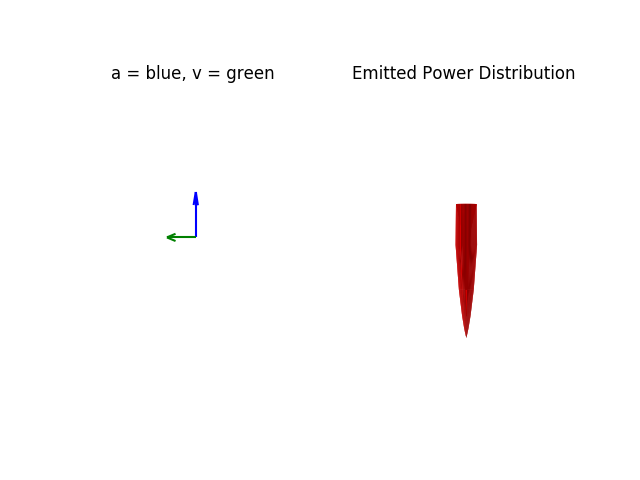

In [4]:
fig = plt.figure()

beta = 0.99
gamma = 1 / np.sqrt(1 - beta**2)



#Angles
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
alpha = 90


#Create the data

x = np.outer(np.cos(phi), np.sin(theta) * rfactor(theta, phi, beta, alpha))
y = np.outer(np.sin(phi), np.sin(theta) * rfactor(theta, phi, beta, alpha))
z = np.outer(np.ones(np.size(phi)), np.cos(theta) * rfactor(theta, phi, beta, alpha))
                       
# Set the viewing angles

va = [0,30]


This cell plots the acceleration and velocity vectors. There are perpendicular in this version.

In [5]:
ax = fig.add_subplot(121, projection='3d')

# Viewing angle for the directions
vad = [0,30]

ax.view_init(vad[0], vad[1])

xq = yq = zq = [0]


# a is the direction of the acceleration and b is beta, the direction of the velocity. Here they
#  are perpendicular
a = [0,0,1]
b = [1,0,0]

# To make them parallel, uncomment these and make the second quiver xr not xq...
# a = [0,0,1]
# b = [0,0,1]
# xq = yq = zq = [0]
# yr = [0.05]
# zr = xr = [0]


u = [a[0]]
v = [a[1]]
w = [a[2]]

ax.quiver(xq, yq, zq, u, v, w, length=0.05, normalize = True, color='b')

u = [b[0]]
v = [b[1]]
w = [b[2]]

ax.quiver(xq, yq, zq, u, v, w, length=0.05, normalize = True, color='g')

set_axes_equal(ax, 1, 2)

plt.axis('off')
plt.title('a = blue, v = green')



Text(0.5,0.92,'a = blue, v = green')

In [6]:
# Plot the surface

ax = fig.add_subplot(122, projection='3d')

ax.view_init(va[0], va[1])


ax.plot_surface(x, y, z, color='r')

# The first number here determines how zoomed in you are on the distribution. To make the image larger, 
#  decrease the number. Increase it to make it smaller.
set_axes_equal(ax, 0.75, 2)

plt.axis('off')
plt.title('Emitted Power Distribution')

plt.show()
